In [1]:
# encoding=utf8
from __future__ import print_function
import argparse
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sys import stdout
import time
from VAE import ConvVAE, MLPVAE, MLPAE
from sklearn.decomposition import PCA, KernelPCA
from tsne import tsne
import pickle
import struct
from sklearn.manifold import TSNE

os.chdir("..")

In [3]:
def magnetization(dataset):
    m = torch.mean(dataset, (2,3))
    return(m)

In [4]:
def obtain_batch(n_batch, sinusoidal=True):
    p0 = batch_size*N*4*n_batch
    batch = b''
    for t in range(0, nTemps):
        p1 = p0 + nSamples*N*4*t        
        batch += fileContent[p1:p1+batch_size*N*4]
        stdout.write("Temperature %i done...\r " % (t))
        stdout.flush()
        time.sleep(0.001)
    print("")  
    batch = np.array(struct.unpack(file_string, batch)).reshape([nTemps*batch_size, N])
    if sinusoidal:
        batch = np.concatenate([np.cos(batch), np.sin(batch)], axis = 1)
    return(batch)

In [5]:
L                   = 64 
N                   = L*L
nTemps              = 28 
Tmin                = 0.225
Tmax                = 1.625
dT                  = 0.05 
nSamples            = 500
batch_size          = 150
nConfigs            = batch_size * nTemps
nBatches            = nSamples // batch_size
nComponents         = 40

In [6]:
directory = 'Monograph/Saved/XY/size64/nConfigs14000/PBC/'
file_string = "f"*nTemps*N*batch_size
T = np.arange(Tmin, Tmax, dT)

In [7]:
print("Loading data...")
with open(directory+'spins.bin', mode='rb') as file: # b is important -> binary
    fileContent = file.read()

Loading data...


In [24]:
PCA_dataset_simple = obtain_batch(0, sinusoidal=False)
# del fileContent

 Temperature 1 done...Temperature 2 done...Temperature 3 done...Temperature 4 done...Temperature 5 done...Temperature 6 done...Temperature 7 done...Temperature 8 done...Temperature 9 done...Temperature 10 done...Temperature 11 done...Temperature 12 done...Temperature 13 done...Temperature 14 done...Temperature 15 done...Temperature 16 done...Temperature 17 done...Temperature 18 done...Temperature 19 done...Temperature 20 done...Temperature 21 done...Temperature 22 done...Temperature 23 done...Temperature 24 done...Temperature 25 done...Temperature 26 done...Temperature 27 done...


In [13]:
del PCA_dataset_simple

In [14]:
PCA_dataset = obtain_batch(0, sinusoidal=True)

 Temperature 1 done...Temperature 2 done...Temperature 3 done...Temperature 4 done...Temperature 5 done...Temperature 6 done...Temperature 7 done...Temperature 8 done...Temperature 9 done...Temperature 10 done...Temperature 11 done...Temperature 12 done...Temperature 13 done...Temperature 14 done...Temperature 15 done...Temperature 16 done...Temperature 17 done...Temperature 18 done...Temperature 19 done...Temperature 20 done...Temperature 21 done...Temperature 22 done...Temperature 23 done...Temperature 24 done...Temperature 25 done...Temperature 26 done...Temperature 27 done...


In [8]:
print(PCA_dataset.shape)

(4200, 8192)


In [11]:
X_embedded = TSNE(n_components=2, verbose=1).fit_transform(PCA_dataset_simple)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2800 samples in 0.679s...
[t-SNE] Computed neighbors for 2800 samples in 45.539s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2800
[t-SNE] Computed conditional probabilities for sample 2000 / 2800
[t-SNE] Computed conditional probabilities for sample 2800 / 2800
[t-SNE] Mean sigma: 16.557440
[t-SNE] KL divergence after 250 iterations with early exaggeration: 102.966705
[t-SNE] Error after 1000 iterations: 2.380727


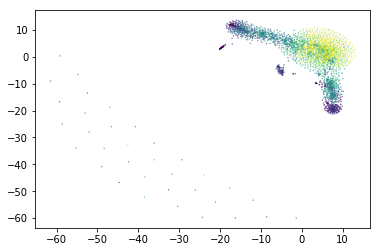

In [13]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=temps, s=0.1)
# plt.xlim(-2.5e-5,2.5e-5)
# plt.ylim(-5e-5,5e-5)
plt.savefig('tsne-try-sklearn-xy.jpg', dpi=300)
plt.show()
plt.close()

In [18]:
X_embedded_2 = TSNE(n_components=2, verbose=1, n_iter=10000).fit_transform(PCA_dataset_simple)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4200 samples in 1.098s...
[t-SNE] Computed neighbors for 4200 samples in 106.125s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4200
[t-SNE] Computed conditional probabilities for sample 2000 / 4200
[t-SNE] Computed conditional probabilities for sample 3000 / 4200
[t-SNE] Computed conditional probabilities for sample 4000 / 4200
[t-SNE] Computed conditional probabilities for sample 4200 / 4200
[t-SNE] Mean sigma: 15.086562
[t-SNE] KL divergence after 250 iterations with early exaggeration: 113.500214
[t-SNE] Error after 5250 iterations: 2.737354


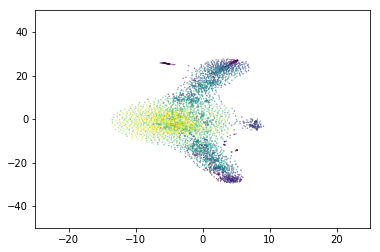

In [20]:
plt.scatter(X_embedded_2[:,0], X_embedded_2[:,1], c=temps, s=0.1)
plt.xlim(-25,25)
plt.ylim(-50,50)
plt.savefig('tsne-try-sklearn-xy_5250_lim.jpg', dpi=300)
plt.show()
plt.close()

In [9]:
X_embedded_3 = TSNE(n_components=2, verbose=1, n_iter=10000).fit_transform(PCA_dataset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4200 samples in 2.505s...
[t-SNE] Computed neighbors for 4200 samples in 206.381s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4200
[t-SNE] Computed conditional probabilities for sample 2000 / 4200
[t-SNE] Computed conditional probabilities for sample 3000 / 4200
[t-SNE] Computed conditional probabilities for sample 4000 / 4200
[t-SNE] Computed conditional probabilities for sample 4200 / 4200
[t-SNE] Mean sigma: 9.552957
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.996025
[t-SNE] Error after 9300 iterations: 2.430239


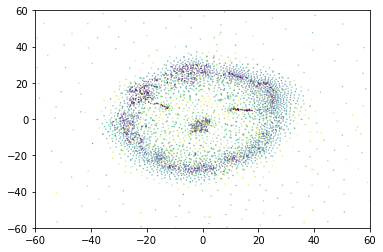

In [16]:
plt.scatter(X_embedded_3[:,0], X_embedded_3[:,1], marker='o', c=temps, s=0.1)
plt.xlim(-60,60)
plt.ylim(-60,60)
plt.savefig('tsne-try-sklearn-xy_sinusoidal_9300.jpg', dpi=300)
plt.show()
plt.close()

In [ ]:
class CNN(nn.Module):
    def __init__(self, channel_dim, hidden_dim=256, output_dim=2, mode='continuous'):
        super().__init__()
        self.C = channel_dim
        self.loss_func = nn.MSELoss()        
        self.batch_size = 100
        self.num_epochs = 100
        self.verbose = True

        # Encoder layers
        self.conv1 =  nn.Conv2d(self.C, 16, kernel_size=5, stride=3, padding=2)         # N x 16 x 21 x 21        
        self.conv2 =  nn.Conv2d(16, 64, kernel_size=3, stride=2, padding=0)             # N x 64 x  9 x  9
        
        # Latent variable layers
        self.l1 = nn.Linear(64*9*9, hidden_dim) # 4608 for size 32
        self.l2 = nn.Linear(hidden_dim, output_dim)
        self.l2.weight.data.uniform_(-3e-3, 3e-3)
        self.l2.bias.data.uniform_(-3e-3, 3e-3)  
        
        self.device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
        self.to(self.device)
        self.optimizer = optim.Adam(self.parameters(), lr = 0.002)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))       
        x = F.leaky_relu(self.conv2(x))
        x = x.view(x.shape[0],-1)
        x = F.leaky_relu(self.l1(x))       
        x = F.leaky_relu(self.l2(x))
        return x
   
    def train(self, dataset):  
        losses = []
        dataloader = torch.utils.data.DataLoader(dataset, batch_size = self.batch_size, num_workers=1)  
        
        # For each epoch
        for epoch in range(0, self.num_epochs):
            # For each batch in the dataloader
            for i, batch in enumerate(dataloader, 0):

                self.zero_grad()
                batch = batch.float().to(self.device)                               
                loss = self.loss_function(outputs, batch)
                loss.backward()
                self.optimizer.step()
                losses.append(loss.item())

                # Output training stats
                if i % 200 == 0 and epoch % 20 == 0 and self.verbose:
                    print('[%d/%d][%d/%d]\tLoss: %.6f' % (epoch, self.num_epochs, i, len(dataloader), loss.item()))                  
        return(losses)

In [10]:
tSNE_image = tsne(PCA_dataset)

Computing pairwise distances...
Computing P-values for point 0 of 2800...
Point 0, Hdiff: 7.6279e+124
Point 1, Hdiff: 7.5849e+124
Point 2, Hdiff: 7.6077e+124
Point 3, Hdiff: 7.5089e+124
Point 4, Hdiff: 7.3414e+124
Point 5, Hdiff: 7.3627e+124
Point 6, Hdiff: 7.1975e+124
Point 7, Hdiff: 7.3225e+124
Point 8, Hdiff: 7.2283e+124
Point 9, Hdiff: 7.2371e+124
Point 10, Hdiff: 7.2186e+124
Point 11, Hdiff: 7.2433e+124
Point 12, Hdiff: 7.1067e+124
Point 13, Hdiff: 6.9952e+124
Point 14, Hdiff: 6.8756e+124
Point 15, Hdiff: 6.8188e+124
Point 16, Hdiff: 6.9215e+124
Point 17, Hdiff: 6.8888e+124
Point 18, Hdiff: 6.7753e+124
Point 19, Hdiff: 6.7569e+124
Point 20, Hdiff: 6.7023e+124
Point 21, Hdiff: 6.6523e+124
Point 22, Hdiff: 6.7483e+124
Point 23, Hdiff: 6.7042e+124
Point 24, Hdiff: 6.8317e+124
Point 25, Hdiff: 6.5855e+124
Point 26, Hdiff: 6.6428e+124
Point 27, Hdiff: 6.4227e+124
Point 28, Hdiff: 6.5860e+124
Point 29, Hdiff: 6.5342e+124
Point 30, Hdiff: 6.3803e+124
Point 31, Hdiff: 6.4975e+124
Point 32

Point 275, Hdiff: 1.1613e+125
Point 276, Hdiff: 1.1774e+125
Point 277, Hdiff: 1.1183e+125
Point 278, Hdiff: 1.1077e+125
Point 279, Hdiff: 1.1304e+125
Point 280, Hdiff: 1.1392e+125
Point 281, Hdiff: 1.1449e+125
Point 282, Hdiff: 1.1073e+125
Point 283, Hdiff: 1.1228e+125
Point 284, Hdiff: 1.0937e+125
Point 285, Hdiff: 1.1165e+125
Point 286, Hdiff: 1.1479e+125
Point 287, Hdiff: 1.1347e+125
Point 288, Hdiff: 1.1426e+125
Point 289, Hdiff: 1.1614e+125
Point 290, Hdiff: 1.1517e+125
Point 291, Hdiff: 1.1616e+125
Point 292, Hdiff: 1.1601e+125
Point 293, Hdiff: 1.1696e+125
Point 294, Hdiff: 1.1426e+125
Point 295, Hdiff: 1.1328e+125
Point 296, Hdiff: 1.1038e+125
Point 297, Hdiff: 1.1154e+125
Point 298, Hdiff: 1.1250e+125
Point 299, Hdiff: 1.1144e+125
Point 300, Hdiff: 8.8444e+124
Point 301, Hdiff: 8.9674e+124
Point 302, Hdiff: 8.7930e+124
Point 303, Hdiff: 8.5437e+124
Point 304, Hdiff: 8.7037e+124
Point 305, Hdiff: 8.1851e+124
Point 306, Hdiff: 7.8829e+124
Point 307, Hdiff: 7.7103e+124
Point 308,

Point 548, Hdiff: 7.2551e+124
Point 549, Hdiff: 6.9544e+124
Point 550, Hdiff: 6.7754e+124
Point 551, Hdiff: 6.7663e+124
Point 552, Hdiff: 6.7265e+124
Point 553, Hdiff: 7.2861e+124
Point 554, Hdiff: 7.2092e+124
Point 555, Hdiff: 7.2556e+124
Point 556, Hdiff: 6.7400e+124
Point 557, Hdiff: 7.2637e+124
Point 558, Hdiff: 7.1896e+124
Point 559, Hdiff: 7.1199e+124
Point 560, Hdiff: 7.2131e+124
Point 561, Hdiff: 7.0835e+124
Point 562, Hdiff: 7.1563e+124
Point 563, Hdiff: 6.8016e+124
Point 564, Hdiff: 6.9187e+124
Point 565, Hdiff: 7.2079e+124
Point 566, Hdiff: 7.2364e+124
Point 567, Hdiff: 7.2885e+124
Point 568, Hdiff: 7.3197e+124
Point 569, Hdiff: 7.1388e+124
Point 570, Hdiff: 7.1925e+124
Point 571, Hdiff: 7.0378e+124
Point 572, Hdiff: 6.6091e+124
Point 573, Hdiff: 6.6241e+124
Point 574, Hdiff: 6.8791e+124
Point 575, Hdiff: 6.4828e+124
Point 576, Hdiff: 6.6620e+124
Point 577, Hdiff: 6.4474e+124
Point 578, Hdiff: 6.4912e+124
Point 579, Hdiff: 6.9754e+124
Point 580, Hdiff: 7.0316e+124
Point 581,

Point 822, Hdiff: 6.2033e+124
Point 823, Hdiff: 6.9945e+124
Point 824, Hdiff: 7.0500e+124
Point 825, Hdiff: 6.7967e+124
Point 826, Hdiff: 6.5565e+124
Point 827, Hdiff: 6.2244e+124
Point 828, Hdiff: 6.7164e+124
Point 829, Hdiff: 6.5462e+124
Point 830, Hdiff: 7.1619e+124
Point 831, Hdiff: 7.0673e+124
Point 832, Hdiff: 7.5778e+124
Point 833, Hdiff: 7.3631e+124
Point 834, Hdiff: 8.0668e+124
Point 835, Hdiff: 7.5988e+124
Point 836, Hdiff: 7.8161e+124
Point 837, Hdiff: 7.0419e+124
Point 838, Hdiff: 6.1479e+124
Point 839, Hdiff: 6.5777e+124
Point 840, Hdiff: 6.6236e+124
Point 841, Hdiff: 6.3041e+124
Point 842, Hdiff: 6.4282e+124
Point 843, Hdiff: 6.8296e+124
Point 844, Hdiff: 7.5766e+124
Point 845, Hdiff: 6.8012e+124
Point 846, Hdiff: 6.6871e+124
Point 847, Hdiff: 7.1239e+124
Point 848, Hdiff: 7.1693e+124
Point 849, Hdiff: 7.2051e+124
Point 850, Hdiff: 7.6397e+124
Point 851, Hdiff: 8.2158e+124
Point 852, Hdiff: 7.8129e+124
Point 853, Hdiff: 7.4243e+124
Point 854, Hdiff: 7.2335e+124
Point 855,

Point 1091, Hdiff: 1.0499e+125
Point 1092, Hdiff: 1.0116e+125
Point 1093, Hdiff: 1.0198e+125
Point 1094, Hdiff: 1.0270e+125
Point 1095, Hdiff: 1.0406e+125
Point 1096, Hdiff: 1.0706e+125
Point 1097, Hdiff: 1.0543e+125
Point 1098, Hdiff: 1.0473e+125
Point 1099, Hdiff: 1.0509e+125
Point 1100, Hdiff: 4.7411e+124
Point 1101, Hdiff: 4.6621e+124
Point 1102, Hdiff: 4.7086e+124
Point 1103, Hdiff: 4.5714e+124
Point 1104, Hdiff: 4.4432e+124
Point 1105, Hdiff: 4.5176e+124
Point 1106, Hdiff: 4.5699e+124
Point 1107, Hdiff: 4.7117e+124
Point 1108, Hdiff: 4.8652e+124
Point 1109, Hdiff: 4.6948e+124
Point 1110, Hdiff: 4.7991e+124
Point 1111, Hdiff: 4.7511e+124
Point 1112, Hdiff: 5.0047e+124
Point 1113, Hdiff: 4.9421e+124
Point 1114, Hdiff: 5.2220e+124
Point 1115, Hdiff: 5.0096e+124
Point 1116, Hdiff: 5.2446e+124
Point 1117, Hdiff: 5.4444e+124
Point 1118, Hdiff: 5.4420e+124
Point 1119, Hdiff: 5.4861e+124
Point 1120, Hdiff: 5.6923e+124
Point 1121, Hdiff: 5.7962e+124
Point 1122, Hdiff: 5.7862e+124
Point 11

Point 1357, Hdiff: 5.2113e+124
Point 1358, Hdiff: 5.1605e+124
Point 1359, Hdiff: 5.1875e+124
Point 1360, Hdiff: 5.3805e+124
Point 1361, Hdiff: 5.4128e+124
Point 1362, Hdiff: 5.2501e+124
Point 1363, Hdiff: 5.3575e+124
Point 1364, Hdiff: 5.4696e+124
Point 1365, Hdiff: 5.5283e+124
Point 1366, Hdiff: 5.3607e+124
Point 1367, Hdiff: 5.1905e+124
Point 1368, Hdiff: 5.8517e+124
Point 1369, Hdiff: 5.6210e+124
Point 1370, Hdiff: 5.8574e+124
Point 1371, Hdiff: 6.4603e+124
Point 1372, Hdiff: 6.2033e+124
Point 1373, Hdiff: 6.1240e+124
Point 1374, Hdiff: 5.6689e+124
Point 1375, Hdiff: 5.6513e+124
Point 1376, Hdiff: 6.0272e+124
Point 1377, Hdiff: 6.0852e+124
Point 1378, Hdiff: 6.1078e+124
Point 1379, Hdiff: 5.9708e+124
Point 1380, Hdiff: 5.9026e+124
Point 1381, Hdiff: 5.6054e+124
Point 1382, Hdiff: 5.9708e+124
Point 1383, Hdiff: 6.3223e+124
Point 1384, Hdiff: 6.5289e+124
Point 1385, Hdiff: 6.5383e+124
Point 1386, Hdiff: 6.9871e+124
Point 1387, Hdiff: 6.9185e+124
Point 1388, Hdiff: 7.0316e+124
Point 13

Point 1620, Hdiff: 7.0493e+124
Point 1621, Hdiff: 7.0328e+124
Point 1622, Hdiff: 7.5956e+124
Point 1623, Hdiff: 7.6532e+124
Point 1624, Hdiff: 7.4696e+124
Point 1625, Hdiff: 7.5426e+124
Point 1626, Hdiff: 7.9434e+124
Point 1627, Hdiff: 7.8502e+124
Point 1628, Hdiff: 7.7027e+124
Point 1629, Hdiff: 7.1714e+124
Point 1630, Hdiff: 7.7091e+124
Point 1631, Hdiff: 7.8525e+124
Point 1632, Hdiff: 8.0769e+124
Point 1633, Hdiff: 7.7736e+124
Point 1634, Hdiff: 7.6500e+124
Point 1635, Hdiff: 7.2156e+124
Point 1636, Hdiff: 6.8311e+124
Point 1637, Hdiff: 6.9191e+124
Point 1638, Hdiff: 6.8027e+124
Point 1639, Hdiff: 6.7310e+124
Point 1640, Hdiff: 6.8604e+124
Point 1641, Hdiff: 7.2633e+124
Point 1642, Hdiff: 7.8391e+124
Point 1643, Hdiff: 8.0225e+124
Point 1644, Hdiff: 7.9624e+124
Point 1645, Hdiff: 8.0648e+124
Point 1646, Hdiff: 7.8161e+124
Point 1647, Hdiff: 7.7695e+124
Point 1648, Hdiff: 8.0604e+124
Point 1649, Hdiff: 7.8728e+124
Point 1650, Hdiff: 7.3929e+124
Point 1651, Hdiff: 7.7472e+124
Point 16

Point 1886, Hdiff: 7.4742e+124
Point 1887, Hdiff: 7.0237e+124
Point 1888, Hdiff: 7.1201e+124
Point 1889, Hdiff: 7.6973e+124
Point 1890, Hdiff: 7.5560e+124
Point 1891, Hdiff: 7.7532e+124
Point 1892, Hdiff: 7.2060e+124
Point 1893, Hdiff: 7.4754e+124
Point 1894, Hdiff: 6.4885e+124
Point 1895, Hdiff: 6.7381e+124
Point 1896, Hdiff: 7.0130e+124
Point 1897, Hdiff: 6.6534e+124
Point 1898, Hdiff: 6.5169e+124
Point 1899, Hdiff: 6.9313e+124
Point 1900, Hdiff: 7.3136e+124
Point 1901, Hdiff: 7.1898e+124
Point 1902, Hdiff: 7.1886e+124
Point 1903, Hdiff: 7.0489e+124
Point 1904, Hdiff: 7.1441e+124
Point 1905, Hdiff: 6.9159e+124
Point 1906, Hdiff: 7.3251e+124
Point 1907, Hdiff: 7.0606e+124
Point 1908, Hdiff: 6.8401e+124
Point 1909, Hdiff: 6.7854e+124
Point 1910, Hdiff: 7.3311e+124
Point 1911, Hdiff: 7.5700e+124
Point 1912, Hdiff: 7.5274e+124
Point 1913, Hdiff: 6.9075e+124
Point 1914, Hdiff: 7.0185e+124
Point 1915, Hdiff: 6.7806e+124
Point 1916, Hdiff: 6.5057e+124
Point 1917, Hdiff: 6.8633e+124
Point 19

Point 2149, Hdiff: 7.6016e+124
Point 2150, Hdiff: 7.1835e+124
Point 2151, Hdiff: 6.9577e+124
Point 2152, Hdiff: 7.7493e+124
Point 2153, Hdiff: 7.2419e+124
Point 2154, Hdiff: 7.5808e+124
Point 2155, Hdiff: 7.0641e+124
Point 2156, Hdiff: 6.9206e+124
Point 2157, Hdiff: 7.0001e+124
Point 2158, Hdiff: 7.2924e+124
Point 2159, Hdiff: 7.2834e+124
Point 2160, Hdiff: 7.2418e+124
Point 2161, Hdiff: 7.1824e+124
Point 2162, Hdiff: 7.2761e+124
Point 2163, Hdiff: 7.0775e+124
Point 2164, Hdiff: 7.1789e+124
Point 2165, Hdiff: 7.2802e+124
Point 2166, Hdiff: 7.6927e+124
Point 2167, Hdiff: 6.9242e+124
Point 2168, Hdiff: 6.9573e+124
Point 2169, Hdiff: 7.2856e+124


KeyboardInterrupt: 

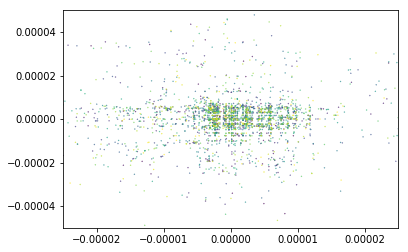

In [25]:
plt.scatter(tSNE_image[:,0], tSNE_image[:,1], c=temps, s=0.1)
plt.xlim(-2.5e-5,2.5e-5)
plt.ylim(-5e-5,5e-5)
plt.savefig('tsne-try-xy.jpg', dpi=300)
plt.show()
plt.close()

In [57]:
# dataset = torch.from_numpy(PCA_dataset[:,:2*N]).view(nConfigs,1,2*L,L)
dataset = torch.from_numpy(PCA_dataset[:,:N]).view(nConfigs,1,L,L)
dataset = torch.cat((dataset, torch.from_numpy(PCA_dataset[:,N:]).view(nConfigs,1,L,L)), dim=1)
# del PCA_dataset

In [73]:
dataset.shape

torch.Size([4200, 2, 64, 64])

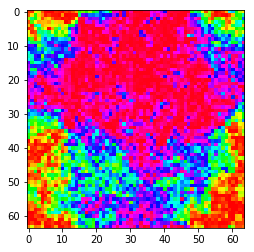

In [74]:
plt.hsv()
plt.imshow(dataset[150,0,:,:])
plt.show()
plt.close()

In [58]:
temps = [[T[i]]*batch_size for i in range(0,nTemps)]
temps = np.array([temp for set_ in temps for temp in set_])
magnetizations = np.squeeze(magnetization(dataset.float()).numpy())

In [77]:
magnetizations.shape

(4200, 2)

In [25]:
magnetization_norms = ((magnetizations**2).sum(1))**0.5

In [26]:
i = np.linspace(0,27,28, dtype=np.int32)*batch_size
sel_magnetization_norms = magnetization_norms[i]

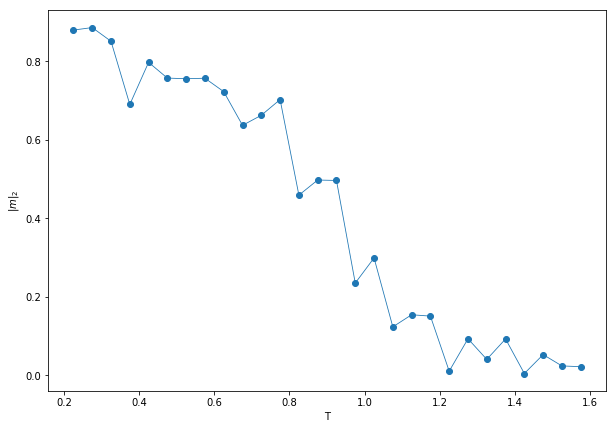

In [27]:
plt.figure(figsize=(10,7))
plt.plot(T, sel_magnetization_norms, 'o-', linewidth=0.8)
plt.savefig(directory+'magnetization_norm.png', dpi=300)
plt.xlabel(r"T")
plt.ylabel(r'$\|m\|_2$')
plt.show()
plt.close()

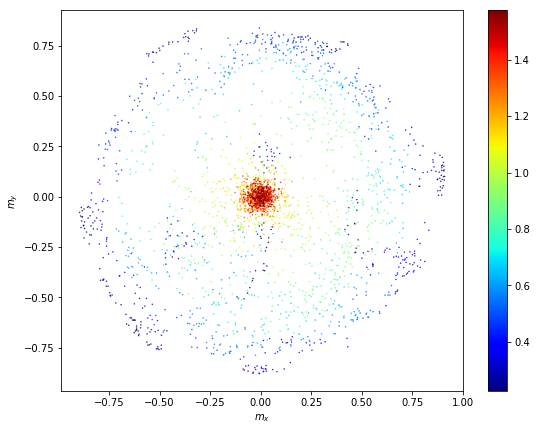

In [28]:
plt.figure(figsize=(9,7))
plt.scatter(magnetizations[:,0],magnetizations[:,1], c=temps, s = 0.2, cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel(r'$m_x$')
plt.ylabel(r'$m_y$')
plt.savefig(directory+'magnetization.jpg',dpi=300)
plt.show()
plt.close()

In [79]:
projected_samples_PCA.shape

(4200, 40)

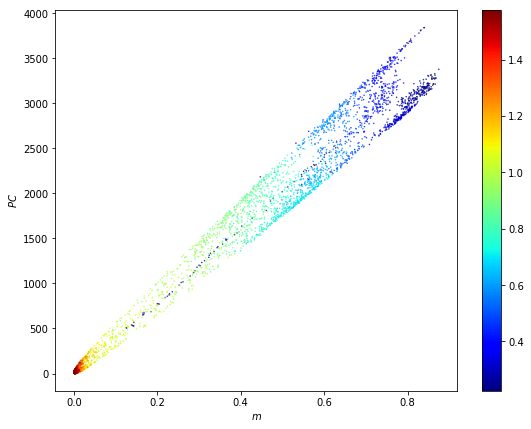

In [85]:
plt.figure(figsize=(9,7))
plt.scatter(magnetizations[:,0]**2 + magnetizations[:,1]**2, projected_samples_PCA[:,0]**2+projected_samples_PCA[:,1]**2, c=temps, s = 0.2, cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel(r'$m$')
plt.ylabel(r'$PC$')
plt.savefig(directory+'magnetization_vs_PC.jpg',dpi=300)
plt.show()
plt.close()

In [ ]:
# dataset = pickle.load(open('spins_nConfig6600.p','rb')).astype(np.uint8)
# PCA_dataset = b2s(dataset)
# dataset = torch.from_numpy(dataset).view(dataset.shape[0], 1, 32, 32)
# temps = np.loadtxt('temperatures_nConfig6600_py3.txt')
# magnetisms = np.squeeze(magnetism(dataset.float()).numpy())

In [51]:
latent_vars = 10
n_channels = 2
net = MLPVAE(n_channels, L, latent_vars)
net.optimizer = optim.Adam(net.parameters(), lr = 0.0001)
# net = ConvVAE(2, latent_vars, L)

In [52]:
for j in range(0, 10):
    losses = net.train(dataset)

[0/100][0/70]	Loss: 1.059022
[20/100][0/70]	Loss: 0.974453
[40/100][0/70]	Loss: 0.973385
[60/100][0/70]	Loss: 0.945535
[80/100][0/70]	Loss: 0.943108
[0/100][0/70]	Loss: 0.977710
[20/100][0/70]	Loss: 0.920788
[40/100][0/70]	Loss: 0.901510
[60/100][0/70]	Loss: 0.941909
[80/100][0/70]	Loss: 0.921791
[0/100][0/70]	Loss: 0.906304
[20/100][0/70]	Loss: 0.917092
[40/100][0/70]	Loss: 0.893601
[60/100][0/70]	Loss: 0.897053
[80/100][0/70]	Loss: 0.932103
[0/100][0/70]	Loss: 0.879459
[20/100][0/70]	Loss: 0.882663
[40/100][0/70]	Loss: 0.874399
[60/100][0/70]	Loss: 0.895444
[80/100][0/70]	Loss: 0.865353
[0/100][0/70]	Loss: 0.932964
[20/100][0/70]	Loss: 0.887733
[40/100][0/70]	Loss: 0.872639
[60/100][0/70]	Loss: 0.907136
[80/100][0/70]	Loss: 0.863834
[0/100][0/70]	Loss: 0.918046
[20/100][0/70]	Loss: 0.874263
[40/100][0/70]	Loss: 0.909635
[60/100][0/70]	Loss: 0.870439
[80/100][0/70]	Loss: 0.901193
[0/100][0/70]	Loss: 0.877060
[20/100][0/70]	Loss: 0.892700
[40/100][0/70]	Loss: 0.873744
[60/100][0/70]	Lo

In [85]:
torch.save(net.state_dict(), directory+'VAE_net.pt')
torch.save(net.optimizer.state_dict(), directory+'VAE_net_optim.pt')

In [53]:
_, z, _ = net.forward_z(dataset.float().cuda())
latents = z.cpu().detach().numpy()

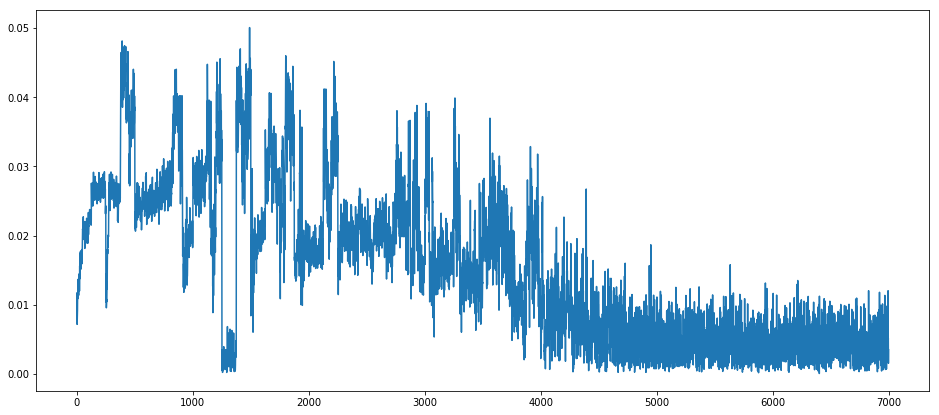

In [67]:
plt.figure(figsize=(16,7))
plt.plot((latents[:,0]**2+latents[:,1]**2)**0.5)
plt.show()
plt.close()

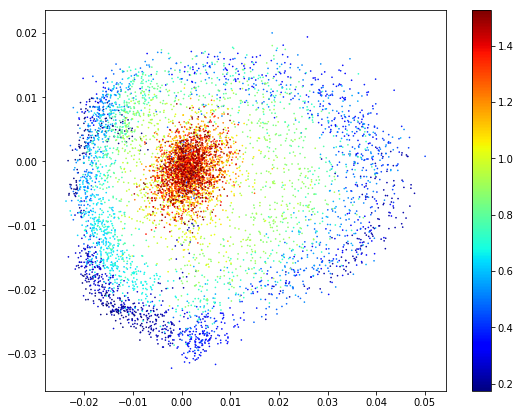

In [55]:
plt.figure(figsize=(9,7))
plt.scatter(latents[:,0],latents[:,1], c=temps, s = 0.4, cmap=plt.cm.jet)
plt.colorbar()
plt.show()
plt.close()

In [196]:
fig1 = plt.figure()
plt.scatter(latents[:,0],latents[:,1],c=temps, s=0.2, cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
fig1.tight_layout()
plt.savefig(directory+'VAE_2pc.jpg',dpi=300)
plt.close()

In [192]:
images = []
fig2, ax2 = plt.subplots(nrows=2, ncols=3)
images.append(ax2[0,0].scatter(latents[:,0],latents[:,1],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,0].set_xlabel('1st PC')
ax2[0,0].set_ylabel('2nd PC')
ax2[0,0].tick_params(labelsize='small')
images.append(ax2[0,1].scatter(latents[:,0],latents[:,2],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,1].set_xlabel('1st PC')
ax2[0,1].set_ylabel('3rd PC')
ax2[0,1].tick_params(labelsize='small')
images.append(ax2[0,2].scatter(latents[:,0],latents[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,2].set_xlabel('First PC')
ax2[0,2].set_ylabel('4th PC')
ax2[0,2].tick_params(labelsize='small')
images.append(ax2[1,0].scatter(latents[:,1],latents[:,2],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,0].set_xlabel('2nd PC')
ax2[1,0].set_ylabel('3rd PC')
ax2[1,0].tick_params(labelsize='small')
images.append(ax2[1,1].scatter(latents[:,1],latents[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,1].set_xlabel('2nd PC')
ax2[1,1].set_ylabel('4th PC')
ax2[1,1].tick_params(labelsize='small')
images.append(ax2[1,2].scatter(latents[:,2],latents[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,2].set_xlabel('3rd PC')
ax2[1,2].set_ylabel('4th PC')
ax2[1,2].tick_params(labelsize='small')
# plt.gca().set_aspect('equal', adjustable='box')
fig2.tight_layout()
fig2.colorbar(images[0], ax=ax2, orientation='vertical', fraction=.1)
plt.savefig(directory+'VAE_1pc-4pc.jpg',dpi=500)
plt.close()

In [193]:
images = []
fig2, ax2 = plt.subplots(nrows=2, ncols=3)
images.append(ax2[0,0].scatter(latents[:,0],latents[:,4],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,0].set_xlabel('1st PC')
ax2[0,0].set_ylabel('5th PC')
ax2[0,0].tick_params(labelsize='small')
images.append(ax2[0,1].scatter(latents[:,0],latents[:,5],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,1].set_xlabel('1st PC')
ax2[0,1].set_ylabel('6th PC')
ax2[0,1].tick_params(labelsize='small')
images.append(ax2[0,2].scatter(latents[:,0],latents[:,6],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,2].set_xlabel('1st PC')
ax2[0,2].set_ylabel('7th PC')
ax2[0,2].tick_params(labelsize='small')
images.append(ax2[1,0].scatter(latents[:,0],latents[:,7],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,0].set_xlabel('1st PC')
ax2[1,0].set_ylabel('8th PC')
ax2[1,0].tick_params(labelsize='small')
images.append(ax2[1,1].scatter(latents[:,0],latents[:,8],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,1].set_xlabel('1st PC')
ax2[1,1].set_ylabel('9th PC')
ax2[1,1].tick_params(labelsize='small')
images.append(ax2[1,2].scatter(latents[:,0],latents[:,9],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,2].set_xlabel('1st PC')
ax2[1,2].set_ylabel('10th PC')
ax2[1,2].tick_params(labelsize='small')
# plt.gca().set_aspect('equal', adjustable='box')
fig2.tight_layout()
fig2.colorbar(images[0], ax=ax2, orientation='vertical', fraction=.1)
plt.savefig(directory+'VAE_5pc-10pc.jpg',dpi=500)
plt.close()

In [ ]:
# fig, ax = plt.subplots((latent_vars+1)//2,2)
# for i in range(0,latent_vars):
#     if latent_vars > 2:
#         im = ax[i%(latent_vars//2),0+2*(i//(latent_vars//2))].scatter(latents[:,i], 2*magnetisms-1, c = temps, s = 0.1)
#         im = ax[i%(latent_vars//2),1+2*(i//(latent_vars//2))].scatter(latents[:,i], temps, c = temps, s = 0.1)
#         ax[i%(latent_vars//2),0+2*(i//(latent_vars//2))].tick_params(labelsize = 3.5)
#         ax[i%(latent_vars//2),1+2*(i//(latent_vars//2))].tick_params(labelsize = 3.5)
#     elif latent_vars == 2:
#         im = ax[0+2*(i//(latent_vars//2))].scatter(latents[:,i], 2*magnetisms-1, c = temps, s = 0.1)
#         im = ax[1+2*(i//(latent_vars//2))].scatter(latents[:,i], temps, c = temps, s = 0.1)
#         ax[0+2*(i//(latent_vars//2))].tick_params(labelsize = 3.5)
#         ax[1+2*(i//(latent_vars//2))].tick_params(labelsize = 3.5)
#     elif latent_vars == 1:
#         im = ax[0].scatter(latents[:,i], 2*magnetisms-1, c = temps, s = 0.1)
#         im = ax[1].scatter(latents[:,i], temps, c = temps, s = 0.1)
#         ax[0].tick_params(labelsize = 3.5)
#         ax[1].tick_params(labelsize = 3.5)
# plt.tight_layout()
# fig.subplots_adjust(right=0.85)
# cbar_ax = fig.add_axes([0.9, 0.1, 0.02, 0.85]) # left, bottom, width, height
# cb = fig.colorbar(im, cax=cbar_ax)
# cb.ax.tick_params(labelsize = 5)
# plt.savefig('VAE_latent_params_01.jpg', dpi = 500)
# plt.close()

In [ ]:
# fig = plt.figure()
# plt.scatter(latents[:,0], -(2*magnetisms-1), c = temps, s = 0.1)
# plt.show()
# plt.close()

In [71]:
net2 = MLPAE(n_channels, L, latent_vars)
net2.optimizer = optim.Adam(net2.parameters(), lr = 0.0001)

In [72]:
for j in range(0, 10):
    losses2 = net2.train(dataset)

[0/100][0/70]	Loss: 0.310000
[20/100][0/70]	Loss: 0.184648
[40/100][0/70]	Loss: 0.131407
[60/100][0/70]	Loss: 0.118370
[80/100][0/70]	Loss: 0.112392
[0/100][0/70]	Loss: 0.111678
[20/100][0/70]	Loss: 0.109340
[40/100][0/70]	Loss: 0.108333
[60/100][0/70]	Loss: 0.108369
[80/100][0/70]	Loss: 0.110678
[0/100][0/70]	Loss: 0.107568
[20/100][0/70]	Loss: 0.106834
[40/100][0/70]	Loss: 0.106752
[60/100][0/70]	Loss: 0.107288
[80/100][0/70]	Loss: 0.105771
[0/100][0/70]	Loss: 0.105725
[20/100][0/70]	Loss: 0.105968
[40/100][0/70]	Loss: 0.106146
[60/100][0/70]	Loss: 0.105164
[80/100][0/70]	Loss: 0.105699
[0/100][0/70]	Loss: 0.105436
[20/100][0/70]	Loss: 0.105056
[40/100][0/70]	Loss: 0.105362
[60/100][0/70]	Loss: 0.106506
[80/100][0/70]	Loss: 0.106329
[0/100][0/70]	Loss: 0.105077
[20/100][0/70]	Loss: 0.105378
[40/100][0/70]	Loss: 0.107204
[60/100][0/70]	Loss: 0.105454
[80/100][0/70]	Loss: 0.105273
[0/100][0/70]	Loss: 0.105384
[20/100][0/70]	Loss: 0.104919
[40/100][0/70]	Loss: 0.104965
[60/100][0/70]	Lo

In [73]:
z2 = net2.forward_z(dataset.float().cuda())
latents2 = z2.cpu().detach().numpy()

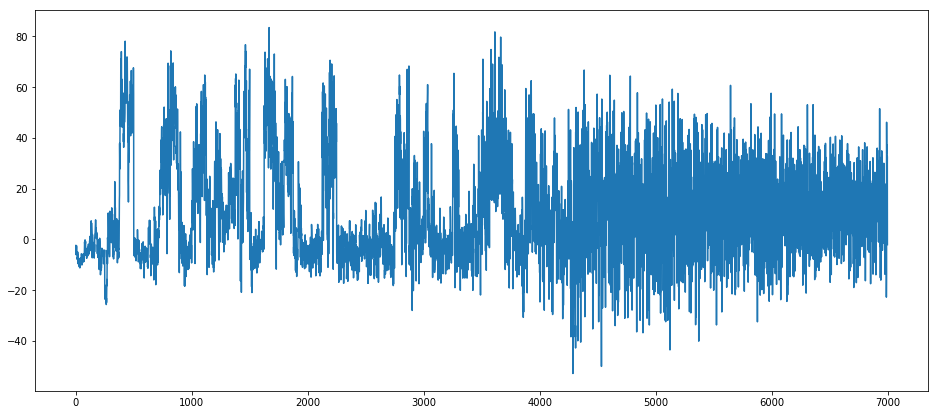

In [76]:
plt.figure(figsize=(16,7))
plt.plot(latents2[:,0])
plt.show()
plt.close()

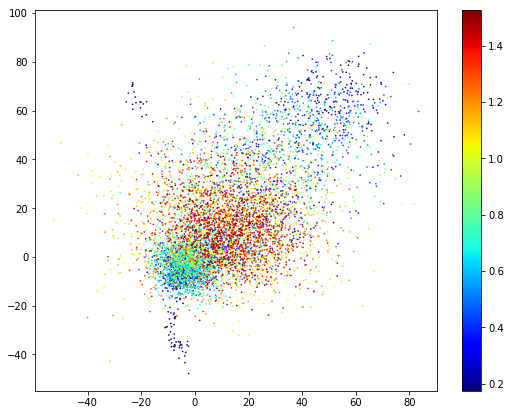

In [82]:
plt.figure(figsize=(9,7))
plt.scatter(latents2[:,0],latents2[:,8], c=temps, s = 0.4, cmap=plt.cm.jet)
plt.colorbar()
plt.show()
plt.close()

In [197]:
fig1 = plt.figure()
plt.scatter(latents2[:,0],latents2[:,1],c=temps, s=0.2, cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
fig1.tight_layout()
plt.savefig(directory+'AE_2pc.jpg',dpi=300)
plt.close()

In [194]:
images = []
fig2, ax2 = plt.subplots(nrows=2, ncols=3)
images.append(ax2[0,0].scatter(latents2[:,0],latents2[:,1],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,0].set_xlabel('1st PC')
ax2[0,0].set_ylabel('2nd PC')
ax2[0,0].tick_params(labelsize='small')
images.append(ax2[0,1].scatter(latents2[:,0],latents2[:,2],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,1].set_xlabel('1st PC')
ax2[0,1].set_ylabel('3rd PC')
ax2[0,1].tick_params(labelsize='small')
images.append(ax2[0,2].scatter(latents2[:,0],latents2[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,2].set_xlabel('First PC')
ax2[0,2].set_ylabel('4th PC')
ax2[0,2].tick_params(labelsize='small')
images.append(ax2[1,0].scatter(latents2[:,1],latents2[:,2],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,0].set_xlabel('2nd PC')
ax2[1,0].set_ylabel('3rd PC')
ax2[1,0].tick_params(labelsize='small')
images.append(ax2[1,1].scatter(latents2[:,1],latents2[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,1].set_xlabel('2nd PC')
ax2[1,1].set_ylabel('4th PC')
ax2[1,1].tick_params(labelsize='small')
images.append(ax2[1,2].scatter(latents2[:,2],latents2[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,2].set_xlabel('3rd PC')
ax2[1,2].set_ylabel('4th PC')
ax2[1,2].tick_params(labelsize='small')
# plt.gca().set_aspect('equal', adjustable='box')
fig2.tight_layout()
fig2.colorbar(images[0], ax=ax2, orientation='vertical', fraction=.1)
plt.savefig(directory+'AE_1pc-4pc.jpg',dpi=500)
plt.close()

In [195]:
images = []
fig2, ax2 = plt.subplots(nrows=2, ncols=3)
images.append(ax2[0,0].scatter(latents2[:,0],latents2[:,4],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,0].set_xlabel('1st PC')
ax2[0,0].set_ylabel('5th PC')
ax2[0,0].tick_params(labelsize='small')
images.append(ax2[0,1].scatter(latents2[:,0],latents2[:,5],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,1].set_xlabel('1st PC')
ax2[0,1].set_ylabel('6th PC')
ax2[0,1].tick_params(labelsize='small')
images.append(ax2[0,2].scatter(latents2[:,0],latents2[:,6],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,2].set_xlabel('1st PC')
ax2[0,2].set_ylabel('7th PC')
ax2[0,2].tick_params(labelsize='small')
images.append(ax2[1,0].scatter(latents2[:,0],latents2[:,7],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,0].set_xlabel('1st PC')
ax2[1,0].set_ylabel('8th PC')
ax2[1,0].tick_params(labelsize='small')
images.append(ax2[1,1].scatter(latents2[:,0],latents2[:,8],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,1].set_xlabel('1st PC')
ax2[1,1].set_ylabel('9th PC')
ax2[1,1].tick_params(labelsize='small')
images.append(ax2[1,2].scatter(latents2[:,0],latents2[:,9],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,2].set_xlabel('1st PC')
ax2[1,2].set_ylabel('10th PC')
ax2[1,2].tick_params(labelsize='small')
# plt.gca().set_aspect('equal', adjustable='box')
fig2.tight_layout()
fig2.colorbar(images[0], ax=ax2, orientation='vertical', fraction=.1)
plt.savefig(directory+'AE_5pc-10pc.jpg',dpi=500)
plt.close()

In [ ]:
# fig, ax = plt.subplots((latent_vars+1)//2,2)
# for i in range(0,latent_vars):
#     if latent_vars > 2:
#         im = ax[i%(latent_vars//2),0+2*(i//(latent_vars//2))].scatter(latents2[:,i], 2*magnetisms-1, c = temps, s = 0.1)
#         im = ax[i%(latent_vars//2),1+2*(i//(latent_vars//2))].scatter(latents2[:,i], temps, c = temps, s = 0.1)
#         ax[i%(latent_vars//2),0+2*(i//(latent_vars//2))].tick_params(labelsize = 3.5)
#         ax[i%(latent_vars//2),1+2*(i//(latent_vars//2))].tick_params(labelsize = 3.5)
#     elif latent_vars == 2:
#         im = ax[0+2*(i//(latent_vars//2))].scatter(latents2[:,i], 2*magnetisms-1, c = temps, s = 0.1)
#         im = ax[1+2*(i//(latent_vars//2))].scatter(latents2[:,i], temps, c = temps, s = 0.1)
#         ax[0+2*(i//(latent_vars//2))].tick_params(labelsize = 3.5)
#         ax[1+2*(i//(latent_vars//2))].tick_params(labelsize = 3.5)
#     elif latent_vars == 1:
#         im = ax[0].scatter(latents2[:,i], 2*magnetisms-1, c = temps, s = 0.1)
#         im = ax[1].scatter(latents2[:,i], temps, c = temps, s = 0.1)
#         ax[0].tick_params(labelsize = 3.5)
#         ax[1].tick_params(labelsize = 3.5)
# plt.tight_layout()
# fig.subplots_adjust(right=0.85)
# cbar_ax = fig.add_axes([0.9, 0.1, 0.02, 0.85]) # left, bottom, width, height
# cb = fig.colorbar(im, cax=cbar_ax)
# cb.ax.tick_params(labelsize = 5)
# plt.savefig('AE_latent_params_01.jpg', dpi = 500)
# plt.close()

In [ ]:
# fig = plt.figure()
# plt.scatter(latents2[:,0], -(2*magnetisms-1), c = temps, s = 0.1)
# plt.show()
# plt.close()

In [15]:
pca = PCA(n_components = nComponents)
pca = pca.fit(PCA_dataset)
projected_samples_PCA = pca.fit_transform(PCA_dataset)

In [64]:
PC = (projected_samples_PCA[:,0]**2 + projected_samples_PCA[:,1]**2)**0.5

In [74]:
nComponents2plot = 14
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(left=0.015, right=0.985, hspace=0.02, wspace=0.05)
for component in range(0, nComponents2plot):
    ax = fig.add_subplot(2, 7, component+1)
    pcs = PC[2*component*batch_size:(2*component+1)*batch_size]
    ax.hist(pcs, bins=40, range=(0,PC.max()))    
    ax.set_title(r'T: %.3f,%.3f' % (T[2*component], T[2*component+1]), {'fontsize': 8})
plt.tight_layout()
plt.savefig(directory+'PC_hist.jpg', dpi = 500)
plt.close()   

In [9]:
# pickle.dump(pca,open(directory+'pca_model.p','wb'))
pca = pickle.load(open(directory+'pca_model.p','rb'))

In [16]:
eigenvectors = pca.components_

In [59]:
eigenvectors.shape
PCA_dataset.shape
projected_samples_PCA.shape

(4200, 40)

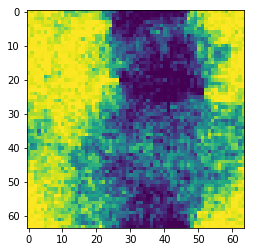

In [22]:
plt.imshow(PCA_dataset[0,:N].reshape(L,L))
plt.show()
plt.close()

In [56]:
plt.hsv()
x = np.linspace(1,L,L)
XX,YY = np.meshgrid(x,x)
nComponents2plot = 12
lattice_indices = np.linspace(1,N,N, dtype=np.int32)
red_lattice_indices = np.linspace(1,N,N, dtype=np.int32)
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.23, wspace=0.05)
for component in range(6, nComponents2plot):
    ax = fig.add_subplot(2, 3, component-5)
    u = 2*eigenvectors[component,:N].reshape(L,L)
    v = 2*eigenvectors[component,N:].reshape(L,L)
    c = np.arctan2(v,u)
    print(component, c.min(), c.max())
    im = ax.quiver(XX,YY,u,v,c,scale=1)    
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    fig.colorbar(im)
#     plt.clim(-np.pi, np.pi)
    ax.set_aspect('equal')   
    ax.set_title(r'Component ' + str(component+1), {'fontsize': 11})
plt.tight_layout()
plt.savefig(directory+'PCs_quiver_2.jpg', dpi = 500)
plt.close()   

6 -3.1405977356558297 3.1376842187162226
7 -3.139499233097103 3.1395218509682805
8 -3.1401989482655233 3.1374190368796366
9 -3.1410381800188265 3.1338405459997336
10 -3.140338062459788 3.1413739718423503
11 -3.141126004805266 3.1414684552294094


<Figure size 432x288 with 0 Axes>

In [55]:
# plt.hsv()
x = np.linspace(1,L,L)
XX,YY = np.meshgrid(x,x)
nComponents2plot = 12
lattice_indices = np.linspace(1,N,N, dtype=np.int32)
red_lattice_indices = np.linspace(1,N,N, dtype=np.int32)
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.23, wspace=0.05)
for component in range(6, nComponents2plot):
    ax = fig.add_subplot(2, 3, component-5)
    u = 2*eigenvectors[component,:N].reshape(L,L)
    v = 2*eigenvectors[component,N:].reshape(L,L)
    c = np.arctan2(v,u)
    print(component, c.min(), c.max())
    im = ax.streamplot(XX, YY, u, v, density=1.6, color=c, linewidth=0.8, cmap='autumn')
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_aspect('equal')   
    ax.set_title(r'Component ' + str(component+1), {'fontsize': 11})
plt.tight_layout()
plt.savefig(directory+'PCs_stream_2.jpg', dpi = 500)
plt.close()  

6 -3.1405977356558297 3.1376842187162226
7 -3.139499233097103 3.1395218509682805
8 -3.1401989482655233 3.1374190368796366
9 -3.1410381800188265 3.1338405459997336
10 -3.140338062459788 3.1413739718423503
11 -3.141126004805266 3.1414684552294094


In [20]:
nComponents2plot = 2
lattice_indices = np.linspace(1,2*N,N//4, dtype=np.int32)
red_lattice_indices = np.linspace(1,2*N,N//4, dtype=np.int32)
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.23, wspace=0.05)
for component in range(2, nComponents2plot+2):
    ax = fig.add_subplot(2, 1, component-1)
    ax.scatter(lattice_indices, eigenvectors[component,lattice_indices-1], s=0.08, c='b')
#     ax.bar(red_lattice_indices, eigenvectors[component,red_lattice_indices-1], bottom=0, width=2, color='b')
    ax.axhline(0, color='black', linestyle='-', linewidth=0.8)
    ax.axvline(N, color='black', linestyle='-', linewidth=0.8)
    ax.set_ylabel('Coef', {'fontsize': 9})
    ax.set_xlabel('Lattice index', {'fontsize': 9})
    ax.set_title(r'Component ' + str(component+1), {'fontsize': 11})
plt.tight_layout()
plt.savefig(directory+'PCs_3&4.jpg', dpi = 500)
plt.close()   

In [15]:
kpca = pickle.load(open(directory+'kpca_model_sigma45.0.p','rb'))
kpca_eigenvectors = kpca.alphas_

FileNotFoundError: [Errno 2] No such file or directory: 'Monograph/Saved/XY/size64/nConfigs2800/FBC/kpca_model_sigma45.0.p'

In [49]:
kpca_eigenvectors.shape

(7000, 40)

In [63]:
nComponents2plot = 2
indices = np.linspace(1,nConfigs,nConfigs, dtype=np.int32)
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.23, wspace=0.05)
for component in range(8, nComponents2plot+8):
    ax = fig.add_subplot(2, 1, component-7)
    ax.scatter(indices, kpca_eigenvectors[indices-1,component], s=0.08, c='b')
#     ax.bar(red_lattice_indices, eigenvectors[component,red_lattice_indices-1], bottom=0, width=2, color='b')
    for temp in range(1, nTemps):
        ax.axvline(batch_size*temp, color='black', linestyle='-', linewidth=0.3)
    ax.axvline(batch_size*13, color='red', linestyle='-', linewidth=0.3)
    ax.axvline(batch_size*15, color='red', linestyle='-', linewidth=0.3)
    ax.axhline(0, color='black', linestyle='-', linewidth=0.8)
    ax.set_ylabel('Coef', {'fontsize': 9})
    ax.set_xlabel('Sample', {'fontsize': 9})
    ax.set_title(r'Component ' + str(component+1), {'fontsize': 11})
plt.tight_layout()
plt.savefig(directory+'KPCs_9&10.jpg', dpi = 500)
plt.close()   

In [16]:
variances_pca = pca.explained_variance_ratio_[:nComponents]
ind = np.arange(1, nComponents+1)
fig = plt.figure()
plt.semilogy(ind,variances_pca,'o-')
plt.ylabel(r'$\sigma^2$')
plt.xlabel('Principal Components')
plt.savefig(directory+'/PCA_total_explained_variance_log_'+str(batch_size)+'.jpg',dpi=300)
plt.close()

In [17]:
fig1 = plt.figure()
plt.scatter(projected_samples_PCA[:,0],projected_samples_PCA[:,1],c=temps, s=0.2, cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('First PC')
plt.ylabel('Second PC')
fig1.tight_layout()
plt.savefig(directory+'PCA_2pc.jpg',dpi=300)
plt.close()

In [18]:
images = []
fig2, ax2 = plt.subplots(nrows=2, ncols=3)
images.append(ax2[0,0].scatter(projected_samples_PCA[:,0],projected_samples_PCA[:,1],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,0].set_xlabel('1st PC')
ax2[0,0].set_ylabel('2nd PC')
ax2[0,0].tick_params(labelsize='small')
images.append(ax2[0,1].scatter(projected_samples_PCA[:,0],projected_samples_PCA[:,2],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,1].set_xlabel('1st PC')
ax2[0,1].set_ylabel('3rd PC')
ax2[0,1].tick_params(labelsize='small')
images.append(ax2[0,2].scatter(projected_samples_PCA[:,0],projected_samples_PCA[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,2].set_xlabel('First PC')
ax2[0,2].set_ylabel('4th PC')
ax2[0,2].tick_params(labelsize='small')
images.append(ax2[1,0].scatter(projected_samples_PCA[:,1],projected_samples_PCA[:,2],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,0].set_xlabel('2nd PC')
ax2[1,0].set_ylabel('3rd PC')
ax2[1,0].tick_params(labelsize='small')
images.append(ax2[1,1].scatter(projected_samples_PCA[:,1],projected_samples_PCA[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,1].set_xlabel('2nd PC')
ax2[1,1].set_ylabel('4th PC')
ax2[1,1].tick_params(labelsize='small')
images.append(ax2[1,2].scatter(projected_samples_PCA[:,2],projected_samples_PCA[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,2].set_xlabel('3rd PC')
ax2[1,2].set_ylabel('4th PC')
ax2[1,2].tick_params(labelsize='small')
# plt.gca().set_aspect('equal', adjustable='box')
fig2.tight_layout()
fig2.colorbar(images[0], ax=ax2, orientation='vertical', fraction=.1)
plt.savefig(directory+'PCA_1pc-4pc.jpg',dpi=500)
plt.close()

In [19]:
images = []
fig2, ax2 = plt.subplots(nrows=2, ncols=3)
images.append(ax2[0,0].scatter(projected_samples_PCA[:,0],projected_samples_PCA[:,4],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,0].set_xlabel('1st PC')
ax2[0,0].set_ylabel('5th PC')
ax2[0,0].tick_params(labelsize='small')
images.append(ax2[0,1].scatter(projected_samples_PCA[:,0],projected_samples_PCA[:,5],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,1].set_xlabel('1st PC')
ax2[0,1].set_ylabel('6th PC')
ax2[0,1].tick_params(labelsize='small')
images.append(ax2[0,2].scatter(projected_samples_PCA[:,0],projected_samples_PCA[:,6],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,2].set_xlabel('1st PC')
ax2[0,2].set_ylabel('7th PC')
ax2[0,2].tick_params(labelsize='small')
images.append(ax2[1,0].scatter(projected_samples_PCA[:,0],projected_samples_PCA[:,7],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,0].set_xlabel('1st PC')
ax2[1,0].set_ylabel('8th PC')
ax2[1,0].tick_params(labelsize='small')
images.append(ax2[1,1].scatter(projected_samples_PCA[:,0],projected_samples_PCA[:,8],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,1].set_xlabel('1st PC')
ax2[1,1].set_ylabel('9th PC')
ax2[1,1].tick_params(labelsize='small')
images.append(ax2[1,2].scatter(projected_samples_PCA[:,0],projected_samples_PCA[:,9],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,2].set_xlabel('1st PC')
ax2[1,2].set_ylabel('10th PC')
ax2[1,2].tick_params(labelsize='small')
# plt.gca().set_aspect('equal', adjustable='box')
fig2.tight_layout()
fig2.colorbar(images[0], ax=ax2, orientation='vertical', fraction=.1)
plt.savefig(directory+'PCA_5pc-10pc.jpg',dpi=500)
plt.close()

In [ ]:
# fig = plt.figure()
# plt.scatter(projected_samples_PCA[:,0], -(2*magnetisms-1), c = temps, s = 0.1)
# plt.show()
# plt.close()

In [93]:
del dataset

In [179]:
sigma = 30.0
degree = 3
coef0 = 100
kernel = 'sigmoid'
kpca = KernelPCA(n_components = nComponents, kernel="rbf", gamma = 0.5/(sigma**2))
# kpca = KernelPCA(n_components = nComponents, kernel=kernel, gamma = 1, coef0 = coef0)
kpca = kpca.fit(PCA_dataset)
projected_samples_KPCA = kpca.fit_transform(PCA_dataset)

In [180]:
# pickle.dump(kpca,open(directory+'kpca_model_sigma'+str(sigma)+'.p','wb'))
pickle.dump(kpca,open(directory+'kpca_model_sigmoid'+'_coef'+str(coef0)+'.p','wb'))

In [181]:
fig = plt.figure()
plt.semilogy(ind,kpca.lambdas_,'o-')
plt.ylabel(r'$\sigma^2$')
plt.xlabel('Principal Components')
# plt.savefig(directory+'/KPCA_total_explained_variance_log_'+str(batch_size)+'_sigma'+str(sigma)+'.png',dpi=300)
plt.savefig(directory+'/KPCA_total_explained_variance_log_sigmoid'+'_coef'+str(coef0)+'.png',dpi=300)
plt.close()

In [182]:
fig1 = plt.figure()
plt.scatter(projected_samples_KPCA[:,0],projected_samples_KPCA[:,1],c=temps, s=0.2, cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('First PC')
plt.ylabel('Second PC')
fig1.tight_layout()
# plt.savefig(directory+'KPCA_2pc_sigma'+str(sigma)+'.png',dpi=300)
plt.savefig(directory+'KPCA_2pc_sigmoid'+'_coef'+str(coef0)+'.png',dpi=300)
plt.close()

In [183]:
images = []
fig2, ax2 = plt.subplots(nrows=2, ncols=3)
images.append(ax2[0,0].scatter(projected_samples_KPCA[:,0],projected_samples_KPCA[:,1],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,0].set_xlabel('First PC')
ax2[0,0].set_ylabel('Second PC')
ax2[0,0].tick_params(labelsize='small')
images.append(ax2[0,1].scatter(projected_samples_KPCA[:,0],projected_samples_KPCA[:,2],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,1].set_xlabel('First PC')
ax2[0,1].set_ylabel('Third PC')
ax2[0,1].tick_params(labelsize='small')
images.append(ax2[0,2].scatter(projected_samples_KPCA[:,0],projected_samples_KPCA[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,2].set_xlabel('First PC')
ax2[0,2].set_ylabel('Fourth PC')
ax2[0,2].tick_params(labelsize='small')
images.append(ax2[1,0].scatter(projected_samples_KPCA[:,1],projected_samples_KPCA[:,2],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,0].set_xlabel('Second PC')
ax2[1,0].set_ylabel('Third PC')
ax2[1,0].tick_params(labelsize='small')
images.append(ax2[1,1].scatter(projected_samples_KPCA[:,1],projected_samples_KPCA[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,1].set_xlabel('Second PC')
ax2[1,1].set_ylabel('Fourth PC')
ax2[1,1].tick_params(labelsize='small')
images.append(ax2[1,2].scatter(projected_samples_KPCA[:,2],projected_samples_KPCA[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,2].set_xlabel('Third PC')
ax2[1,2].set_ylabel('Fourth PC')
ax2[1,2].tick_params(labelsize='small')
# plt.gca().set_aspect('equal', adjustable='box')
fig2.tight_layout()
fig2.colorbar(images[0], ax=ax2, orientation='vertical', fraction=.1)
# plt.savefig(directory+'KPCA_1pc-4pc_sigma'+str(sigma)+'.jpg',dpi=500)
plt.savefig(directory+'KPCA_1pc-4pc_sigmoid'+'_coef'+str(coef0)+'.png',dpi=500)
plt.close()

In [184]:
images = []
fig2, ax2 = plt.subplots(nrows=2, ncols=3)
images.append(ax2[0,0].scatter(projected_samples_KPCA[:,0],projected_samples_KPCA[:,4],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,0].set_xlabel('First PC')
ax2[0,0].set_ylabel('5th PC')
ax2[0,0].tick_params(labelsize='small')
images.append(ax2[0,1].scatter(projected_samples_KPCA[:,0],projected_samples_KPCA[:,5],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,1].set_xlabel('First PC')
ax2[0,1].set_ylabel('6th PC')
ax2[0,1].tick_params(labelsize='small')
images.append(ax2[0,2].scatter(projected_samples_KPCA[:,0],projected_samples_KPCA[:,6],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,2].set_xlabel('First PC')
ax2[0,2].set_ylabel('7th PC')
ax2[0,2].tick_params(labelsize='small')
images.append(ax2[1,0].scatter(projected_samples_KPCA[:,0],projected_samples_KPCA[:,7],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,0].set_xlabel('First PC')
ax2[1,0].set_ylabel('8th PC')
ax2[1,0].tick_params(labelsize='small')
images.append(ax2[1,1].scatter(projected_samples_KPCA[:,0],projected_samples_KPCA[:,8],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,1].set_xlabel('First PC')
ax2[1,1].set_ylabel('9th PC')
ax2[1,1].tick_params(labelsize='small')
images.append(ax2[1,2].scatter(projected_samples_KPCA[:,0],projected_samples_KPCA[:,9],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,2].set_xlabel('First PC')
ax2[1,2].set_ylabel('10th PC')
ax2[1,2].tick_params(labelsize='small')
# plt.gca().set_aspect('equal', adjustable='box')
fig2.tight_layout()
fig2.colorbar(images[0], ax=ax2, orientation='vertical', fraction=.1)
# plt.savefig(directory+'KPCA_5pc-10pc_sigma'+str(sigma)+'.jpg',dpi=500)
plt.savefig(directory+'KPCA_5pc-10pc_sigmoid'+'_coef'+str(coef0)+'.png',dpi=500)
plt.close()

In [ ]:
# fig = plt.figure()
# plt.scatter(projected_samples_KPCA[:,0], (2*magnetisms-1), c = temps, s = 0.1)
# plt.show()
# plt.close()

In [ ]:
# fig, ax = plt.subplots(2,2)
# ax[0,0].scatter(projected_samples_PCA[:,0], -(2*magnetisms-1), c = temps, s = 0.1)
# ax[0,1].scatter(projected_samples_KPCA[:,0], (2*magnetisms-1), c = temps, s = 0.1)
# ax[1,0].scatter(latents2[:,0], -(2*magnetisms-1), c = temps, s = 0.1)
# ax[1,1].scatter(latents[:,0], -(2*magnetisms-1), c = temps, s = 0.1)
# ax[0,0].text(-25, 0.5, r'PCA', fontsize=10, bbox=dict(fc="none"))
# ax[0,1].text(-0.5, 0.5, r'KPCA', fontsize=10, bbox=dict(fc="none"))
# ax[1,0].text(-7.5, 0.5, r'AE', fontsize=10, bbox=dict(fc="none"))
# ax[1,1].text(-0.75, 0.5, r'VAE', fontsize=10, bbox=dict(fc="none"))
# ax[0,0].set_ylabel(r'Magnetization')
# ax[0,0].set_xlabel(r'First component')
# ax[0,1].set_ylabel(r'Magnetization')
# ax[0,1].set_xlabel(r'First component')
# ax[1,0].set_ylabel(r'Magnetization')
# ax[1,0].set_xlabel(r'Latent variable')
# ax[1,1].set_ylabel(r'Magnetization')
# ax[1,1].set_xlabel(r'Latent variable')
# plt.tight_layout()
# plt.savefig('comparison.jpg', dpi = 500)
# plt.show()
# plt.close()plt.

In [ ]:
# latent_vars2 = 10
# net2 = MLPVAE(1,latent_vars2)

In [ ]:
# for j in range(0, 10):
#     losses = net2.train(dataset)

In [ ]:
# _, z2_10, _ = net2.forward_z(dataset.float().cuda())

In [ ]:
# latents2_10 = z2_10.cpu().detach().numpy()

In [ ]:
# latents2_10.shape

In [ ]:
# fig, ax = plt.subplots(np.min([2,latent_vars2]),(latent_vars2+1)//2)
# for i in range(0,latent_vars2):
#     if latent_vars2 > 2:
#         im = ax[i//(latent_vars2//2),i%(latent_vars2//2)].scatter(latents2_10[:,i], 2*magnetisms-1, c = temps, s = 0.1)
#         ax[i//(latent_vars2//2),i%(latent_vars2//2)].tick_params(labelsize = 3.5)
#     elif latent_vars2 == 2:
#         im = ax[i//(latent_vars2//2)].scatter(latents2_10[:,i], 2*magnetisms-1, c = temps, s = 0.1)
#         ax[i//(latent_vars2//2)].tick_params(labelsize = 3.5)
#     elif latent_vars2 == 1:
#         im = ax.scatter(latents2_10[:,i], 2*magnetisms-1, c = temps, s = 0.1)
#         ax.tick_params(labelsize = 3.5)
# plt.tight_layout()
# fig.subplots_adjust(right=0.85)
# cbar_ax = fig.add_axes([0.9, 0.1, 0.02, 0.85]) # left, bottom, width, height
# cb = fig.colorbar(im, cax=cbar_ax)
# cb.ax.tick_params(labelsize = 5)
# plt.savefig('VAE_latent_params_'+str(latent_vars2)+'_wt.jpg', dpi = 500)
# plt.close()

In [ ]:
# net4 = MLPAE(1,latent_vars2)

In [ ]:
# for j in range(0, 10):
#     losses = net4.train(dataset)

In [ ]:
# z4 = net4.forward_z(dataset.float().cuda())

In [ ]:
# latents4 = z4.cpu().detach().numpy()

In [ ]:
# fig, ax = plt.subplots(np.min([2,latent_vars2]),(latent_vars2+1)//2)
# for i in range(0,latent_vars2):
#     if latent_vars2 > 2:
#         im = ax[i//(latent_vars2//2),i%(latent_vars2//2)].scatter(latents4[:,i], 2*magnetisms-1, c = temps, s = 0.1)
#         ax[i//(latent_vars2//2),i%(latent_vars2//2)].tick_params(labelsize = 3.5)
#     elif latent_vars2 == 2:
#         im = ax[i//(latent_vars2//2)].scatter(latents4[:,i], 2*magnetisms-1, c = temps, s = 0.1)
#         ax[i//(latent_vars2//2)].tick_params(labelsize = 3.5)
#     elif latent_vars2 == 1:
#         im = ax.scatter(latents4[:,i], 2*magnetisms-1, c = temps, s = 0.1)
#         ax.tick_params(labelsize = 3.5)
# plt.tight_layout()
# fig.subplots_adjust(right=0.85)
# cbar_ax = fig.add_axes([0.9, 0.1, 0.02, 0.85]) # left, bottom, width, height
# cb = fig.colorbar(im, cax=cbar_ax)
# cb.ax.tick_params(labelsize = 5)
# plt.savefig('AE_latent_params_'+str(latent_vars2)+'_wt.jpg', dpi = 500)
# plt.close()

In [22]:
pca_simple = PCA(n_components = nComponents)
pca_simple = pca_simple.fit(PCA_dataset_simple)
projected_samples_PCA_simple = pca_simple.fit_transform(PCA_dataset_simple)

In [23]:
variances_pca_simple = pca_simple.explained_variance_ratio_[:nComponents]
ind = np.arange(1, nComponents+1)
fig = plt.figure()
plt.semilogy(ind,variances_pca_simple,'o-')
plt.ylabel(r'$\sigma^2$')
plt.xlabel('Principal Components')
plt.savefig(directory+'/PCA_total_explained_variance_log_'+str(batch_size)+'_simple.jpg',dpi=300)
plt.close()

In [24]:
fig1 = plt.figure()
plt.scatter(projected_samples_PCA_simple[:,0],projected_samples_PCA_simple[:,1],c=temps, s=0.2, cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('First PC')
plt.ylabel('Second PC')
fig1.tight_layout()
plt.savefig(directory+'PCA_2pc_simple.jpg',dpi=300)
plt.close()

In [25]:
images = []
fig2, ax2 = plt.subplots(nrows=2, ncols=3)
images.append(ax2[0,0].scatter(projected_samples_PCA_simple[:,0],projected_samples_PCA_simple[:,1],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,0].set_xlabel('1st PC')
ax2[0,0].set_ylabel('2nd PC')
ax2[0,0].tick_params(labelsize='small')
images.append(ax2[0,1].scatter(projected_samples_PCA_simple[:,0],projected_samples_PCA_simple[:,2],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,1].set_xlabel('1st PC')
ax2[0,1].set_ylabel('3rd PC')
ax2[0,1].tick_params(labelsize='small')
images.append(ax2[0,2].scatter(projected_samples_PCA_simple[:,0],projected_samples_PCA_simple[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,2].set_xlabel('First PC')
ax2[0,2].set_ylabel('4th PC')
ax2[0,2].tick_params(labelsize='small')
images.append(ax2[1,0].scatter(projected_samples_PCA_simple[:,1],projected_samples_PCA_simple[:,2],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,0].set_xlabel('2nd PC')
ax2[1,0].set_ylabel('3rd PC')
ax2[1,0].tick_params(labelsize='small')
images.append(ax2[1,1].scatter(projected_samples_PCA_simple[:,1],projected_samples_PCA_simple[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,1].set_xlabel('2nd PC')
ax2[1,1].set_ylabel('4th PC')
ax2[1,1].tick_params(labelsize='small')
images.append(ax2[1,2].scatter(projected_samples_PCA_simple[:,2],projected_samples_PCA_simple[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,2].set_xlabel('3rd PC')
ax2[1,2].set_ylabel('4th PC')
ax2[1,2].tick_params(labelsize='small')
# plt.gca().set_aspect('equal', adjustable='box')
fig2.tight_layout()
fig2.colorbar(images[0], ax=ax2, orientation='vertical', fraction=.1)
plt.savefig(directory+'PCA_1pc-4pc_simple.jpg',dpi=500)
plt.close()

In [26]:
images = []
fig2, ax2 = plt.subplots(nrows=2, ncols=3)
images.append(ax2[0,0].scatter(projected_samples_PCA_simple[:,0],projected_samples_PCA_simple[:,4],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,0].set_xlabel('1st PC')
ax2[0,0].set_ylabel('5th PC')
ax2[0,0].tick_params(labelsize='small')
images.append(ax2[0,1].scatter(projected_samples_PCA_simple[:,0],projected_samples_PCA_simple[:,5],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,1].set_xlabel('1st PC')
ax2[0,1].set_ylabel('6th PC')
ax2[0,1].tick_params(labelsize='small')
images.append(ax2[0,2].scatter(projected_samples_PCA_simple[:,0],projected_samples_PCA_simple[:,6],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,2].set_xlabel('1st PC')
ax2[0,2].set_ylabel('7th PC')
ax2[0,2].tick_params(labelsize='small')
images.append(ax2[1,0].scatter(projected_samples_PCA_simple[:,0],projected_samples_PCA_simple[:,7],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,0].set_xlabel('1st PC')
ax2[1,0].set_ylabel('8th PC')
ax2[1,0].tick_params(labelsize='small')
images.append(ax2[1,1].scatter(projected_samples_PCA_simple[:,0],projected_samples_PCA_simple[:,8],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,1].set_xlabel('1st PC')
ax2[1,1].set_ylabel('9th PC')
ax2[1,1].tick_params(labelsize='small')
images.append(ax2[1,2].scatter(projected_samples_PCA_simple[:,0],projected_samples_PCA_simple[:,9],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,2].set_xlabel('1st PC')
ax2[1,2].set_ylabel('10th PC')
ax2[1,2].tick_params(labelsize='small')
# plt.gca().set_aspect('equal', adjustable='box')
fig2.tight_layout()
fig2.colorbar(images[0], ax=ax2, orientation='vertical', fraction=.1)
plt.savefig(directory+'PCA_5pc-10pc_simple.jpg',dpi=500)
plt.close()

In [37]:
eigenvectors_simple = pca_simple.components_

In [38]:
eigenvectors_simple.shape

(40, 4096)

In [39]:
nComponents2plot = 6
lattice_indices = np.linspace(1,N,N, dtype=np.int32)
red_lattice_indices = np.linspace(1,N,N, dtype=np.int32)
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.23, wspace=0.05)
for component in range(0, nComponents2plot):
    ax = fig.add_subplot(2, 3, component+1)
    ax.imshow(eigenvectors_simple[component,:].reshape(L,L))
    ax.set_title(r'Component ' + str(component+1), {'fontsize': 11})
plt.tight_layout()
plt.savefig(directory+'PCs_simple.jpg', dpi = 500)
plt.close()   

In [32]:
sigma = 50.0
degree = 3
coef0 = 100
kernel = 'sigmoid'
kpca_simple = KernelPCA(n_components = nComponents, kernel="rbf", gamma = 0.5/(sigma**2))
# kpca = KernelPCA(n_components = nComponents, kernel=kernel, gamma = 1, coef0 = coef0)
kpca_simple = kpca_simple.fit(PCA_dataset_simple)
projected_samples_KPCA_simple = kpca_simple.fit_transform(PCA_dataset_simple)

In [33]:
fig = plt.figure()
plt.semilogy(ind,kpca_simple.lambdas_,'o-')
plt.ylabel(r'$\sigma^2$')
plt.xlabel('Principal Components')
plt.savefig(directory+'/KPCA_total_explained_variance_log_'+str(batch_size)+'_sigma'+str(sigma)+'_simple.png',dpi=300)
# plt.savefig(directory+'/KPCA_total_explained_variance_log_sigmoid'+'_coef'+str(coef0)+'_simple.png',dpi=300)
plt.close()

In [34]:
fig1 = plt.figure()
plt.scatter(projected_samples_KPCA_simple[:,0],projected_samples_KPCA_simple[:,1],c=temps, s=0.2, cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('First PC')
plt.ylabel('Second PC')
fig1.tight_layout()
# plt.savefig(directory+'KPCA_2pc_sigma'+str(sigma)+'.png',dpi=300)
plt.savefig(directory+'KPCA_2pc'+'_sigma'+str(sigma)+'_simple.png',dpi=300)
plt.close()

In [35]:
images = []
fig2, ax2 = plt.subplots(nrows=2, ncols=3)
images.append(ax2[0,0].scatter(projected_samples_KPCA_simple[:,0],projected_samples_KPCA_simple[:,1],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,0].set_xlabel('First PC')
ax2[0,0].set_ylabel('Second PC')
ax2[0,0].tick_params(labelsize='small')
images.append(ax2[0,1].scatter(projected_samples_KPCA_simple[:,0],projected_samples_KPCA_simple[:,2],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,1].set_xlabel('First PC')
ax2[0,1].set_ylabel('Third PC')
ax2[0,1].tick_params(labelsize='small')
images.append(ax2[0,2].scatter(projected_samples_KPCA_simple[:,0],projected_samples_KPCA_simple[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,2].set_xlabel('First PC')
ax2[0,2].set_ylabel('Fourth PC')
ax2[0,2].tick_params(labelsize='small')
images.append(ax2[1,0].scatter(projected_samples_KPCA_simple[:,1],projected_samples_KPCA_simple[:,2],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,0].set_xlabel('Second PC')
ax2[1,0].set_ylabel('Third PC')
ax2[1,0].tick_params(labelsize='small')
images.append(ax2[1,1].scatter(projected_samples_KPCA_simple[:,1],projected_samples_KPCA_simple[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,1].set_xlabel('Second PC')
ax2[1,1].set_ylabel('Fourth PC')
ax2[1,1].tick_params(labelsize='small')
images.append(ax2[1,2].scatter(projected_samples_KPCA_simple[:,2],projected_samples_KPCA_simple[:,3],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,2].set_xlabel('Third PC')
ax2[1,2].set_ylabel('Fourth PC')
ax2[1,2].tick_params(labelsize='small')
# plt.gca().set_aspect('equal', adjustable='box')
fig2.tight_layout()
fig2.colorbar(images[0], ax=ax2, orientation='vertical', fraction=.1)
plt.savefig(directory+'KPCA_1pc-4pc_sigma'+str(sigma)+'_simple.jpg',dpi=500)
# plt.savefig(directory+'KPCA_1pc-4pc_sigmoid'+'_coef'+str(coef0)+'.png',dpi=500)
plt.close()

In [36]:
images = []
fig2, ax2 = plt.subplots(nrows=2, ncols=3)
images.append(ax2[0,0].scatter(projected_samples_KPCA_simple[:,0],projected_samples_KPCA_simple[:,4],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,0].set_xlabel('First PC')
ax2[0,0].set_ylabel('5th PC')
ax2[0,0].tick_params(labelsize='small')
images.append(ax2[0,1].scatter(projected_samples_KPCA_simple[:,0],projected_samples_KPCA_simple[:,5],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,1].set_xlabel('First PC')
ax2[0,1].set_ylabel('6th PC')
ax2[0,1].tick_params(labelsize='small')
images.append(ax2[0,2].scatter(projected_samples_KPCA_simple[:,0],projected_samples_KPCA_simple[:,6],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[0,2].set_xlabel('First PC')
ax2[0,2].set_ylabel('7th PC')
ax2[0,2].tick_params(labelsize='small')
images.append(ax2[1,0].scatter(projected_samples_KPCA_simple[:,0],projected_samples_KPCA_simple[:,7],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,0].set_xlabel('First PC')
ax2[1,0].set_ylabel('8th PC')
ax2[1,0].tick_params(labelsize='small')
images.append(ax2[1,1].scatter(projected_samples_KPCA_simple[:,0],projected_samples_KPCA_simple[:,8],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,1].set_xlabel('First PC')
ax2[1,1].set_ylabel('9th PC')
ax2[1,1].tick_params(labelsize='small')
images.append(ax2[1,2].scatter(projected_samples_KPCA_simple[:,0],projected_samples_KPCA_simple[:,9],c=temps, s=0.2, cmap=plt.cm.jet))
ax2[1,2].set_xlabel('First PC')
ax2[1,2].set_ylabel('10th PC')
ax2[1,2].tick_params(labelsize='small')
# plt.gca().set_aspect('equal', adjustable='box')
fig2.tight_layout()
fig2.colorbar(images[0], ax=ax2, orientation='vertical', fraction=.1)
plt.savefig(directory+'KPCA_5pc-10pc_sigma'+str(sigma)+'_simple.jpg',dpi=500)
# plt.savefig(directory+'KPCA_5pc-10pc_sigmoid'+'_coef'+str(coef0)+'.png',dpi=500)
plt.close()

In [55]:
D = np.zeros([nConfigs,nConfigs])
for i in range(0, nConfigs):
    for j in range(0, i):
        dif = np.absolute(PCA_dataset_simple[i,:]-PCA_dataset_simple[j,:])
        dif[dif > np.pi] = 2*np.pi - dif[dif > np.pi]
        D[i,j] = (dif**2).sum()
    print("Iter %d" % i)

Iter 0
Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
Iter 11
Iter 12
Iter 13
Iter 14
Iter 15
Iter 16
Iter 17
Iter 18
Iter 19
Iter 20
Iter 21
Iter 22
Iter 23
Iter 24
Iter 25
Iter 26
Iter 27
Iter 28
Iter 29
Iter 30
Iter 31
Iter 32
Iter 33
Iter 34
Iter 35
Iter 36
Iter 37
Iter 38
Iter 39
Iter 40
Iter 41
Iter 42
Iter 43
Iter 44
Iter 45
Iter 46
Iter 47
Iter 48
Iter 49
Iter 50
Iter 51
Iter 52
Iter 53
Iter 54
Iter 55
Iter 56
Iter 57
Iter 58
Iter 59
Iter 60
Iter 61
Iter 62
Iter 63
Iter 64
Iter 65
Iter 66
Iter 67
Iter 68
Iter 69
Iter 70
Iter 71
Iter 72
Iter 73
Iter 74
Iter 75
Iter 76
Iter 77
Iter 78
Iter 79
Iter 80
Iter 81
Iter 82
Iter 83
Iter 84
Iter 85
Iter 86
Iter 87
Iter 88
Iter 89
Iter 90
Iter 91
Iter 92
Iter 93
Iter 94
Iter 95
Iter 96
Iter 97
Iter 98
Iter 99
Iter 100
Iter 101
Iter 102
Iter 103
Iter 104
Iter 105
Iter 106
Iter 107
Iter 108
Iter 109
Iter 110
Iter 111
Iter 112
Iter 113
Iter 114
Iter 115
Iter 116
Iter 117
Iter 118
Iter 119
Iter 120
Iter 121
Iter 122
Ite

Iter 923
Iter 924
Iter 925
Iter 926
Iter 927
Iter 928
Iter 929
Iter 930
Iter 931
Iter 932
Iter 933
Iter 934
Iter 935
Iter 936
Iter 937
Iter 938
Iter 939
Iter 940
Iter 941
Iter 942
Iter 943
Iter 944
Iter 945
Iter 946
Iter 947
Iter 948
Iter 949
Iter 950
Iter 951
Iter 952
Iter 953
Iter 954
Iter 955
Iter 956
Iter 957
Iter 958
Iter 959
Iter 960
Iter 961
Iter 962
Iter 963
Iter 964
Iter 965
Iter 966
Iter 967
Iter 968
Iter 969
Iter 970
Iter 971
Iter 972
Iter 973
Iter 974
Iter 975
Iter 976
Iter 977
Iter 978
Iter 979
Iter 980
Iter 981
Iter 982
Iter 983
Iter 984
Iter 985
Iter 986
Iter 987
Iter 988
Iter 989
Iter 990
Iter 991
Iter 992
Iter 993
Iter 994
Iter 995
Iter 996
Iter 997
Iter 998
Iter 999
Iter 1000
Iter 1001
Iter 1002
Iter 1003
Iter 1004
Iter 1005
Iter 1006
Iter 1007
Iter 1008
Iter 1009
Iter 1010
Iter 1011
Iter 1012
Iter 1013
Iter 1014
Iter 1015
Iter 1016
Iter 1017
Iter 1018
Iter 1019
Iter 1020
Iter 1021
Iter 1022
Iter 1023
Iter 1024
Iter 1025
Iter 1026
Iter 1027
Iter 1028
Iter 1029
Iter 10

Iter 1751
Iter 1752
Iter 1753
Iter 1754
Iter 1755
Iter 1756
Iter 1757
Iter 1758
Iter 1759
Iter 1760
Iter 1761
Iter 1762
Iter 1763
Iter 1764
Iter 1765
Iter 1766
Iter 1767
Iter 1768
Iter 1769
Iter 1770
Iter 1771
Iter 1772
Iter 1773
Iter 1774
Iter 1775
Iter 1776
Iter 1777
Iter 1778
Iter 1779
Iter 1780
Iter 1781
Iter 1782
Iter 1783
Iter 1784
Iter 1785
Iter 1786
Iter 1787
Iter 1788
Iter 1789
Iter 1790
Iter 1791
Iter 1792
Iter 1793
Iter 1794
Iter 1795
Iter 1796
Iter 1797
Iter 1798
Iter 1799
Iter 1800
Iter 1801
Iter 1802
Iter 1803
Iter 1804
Iter 1805
Iter 1806
Iter 1807
Iter 1808
Iter 1809
Iter 1810
Iter 1811
Iter 1812
Iter 1813
Iter 1814
Iter 1815
Iter 1816
Iter 1817
Iter 1818
Iter 1819
Iter 1820
Iter 1821
Iter 1822
Iter 1823
Iter 1824
Iter 1825
Iter 1826
Iter 1827
Iter 1828
Iter 1829
Iter 1830
Iter 1831
Iter 1832
Iter 1833
Iter 1834
Iter 1835
Iter 1836
Iter 1837
Iter 1838
Iter 1839
Iter 1840
Iter 1841
Iter 1842
Iter 1843
Iter 1844
Iter 1845
Iter 1846
Iter 1847
Iter 1848
Iter 1849
Iter 1850


Iter 2572
Iter 2573
Iter 2574
Iter 2575
Iter 2576
Iter 2577
Iter 2578
Iter 2579
Iter 2580
Iter 2581
Iter 2582
Iter 2583
Iter 2584
Iter 2585
Iter 2586
Iter 2587
Iter 2588
Iter 2589
Iter 2590
Iter 2591
Iter 2592
Iter 2593
Iter 2594
Iter 2595
Iter 2596
Iter 2597
Iter 2598
Iter 2599
Iter 2600
Iter 2601
Iter 2602
Iter 2603
Iter 2604
Iter 2605
Iter 2606
Iter 2607
Iter 2608
Iter 2609
Iter 2610
Iter 2611
Iter 2612
Iter 2613
Iter 2614
Iter 2615
Iter 2616
Iter 2617
Iter 2618
Iter 2619
Iter 2620
Iter 2621
Iter 2622
Iter 2623
Iter 2624
Iter 2625
Iter 2626
Iter 2627
Iter 2628
Iter 2629
Iter 2630
Iter 2631
Iter 2632
Iter 2633
Iter 2634
Iter 2635
Iter 2636
Iter 2637
Iter 2638
Iter 2639
Iter 2640
Iter 2641
Iter 2642
Iter 2643
Iter 2644
Iter 2645
Iter 2646
Iter 2647
Iter 2648
Iter 2649
Iter 2650
Iter 2651
Iter 2652
Iter 2653
Iter 2654
Iter 2655
Iter 2656
Iter 2657
Iter 2658
Iter 2659
Iter 2660
Iter 2661
Iter 2662
Iter 2663
Iter 2664
Iter 2665
Iter 2666
Iter 2667
Iter 2668
Iter 2669
Iter 2670
Iter 2671


Iter 3392
Iter 3393
Iter 3394
Iter 3395
Iter 3396
Iter 3397
Iter 3398
Iter 3399
Iter 3400
Iter 3401
Iter 3402
Iter 3403
Iter 3404
Iter 3405
Iter 3406
Iter 3407
Iter 3408
Iter 3409
Iter 3410
Iter 3411
Iter 3412
Iter 3413
Iter 3414
Iter 3415
Iter 3416
Iter 3417
Iter 3418
Iter 3419
Iter 3420
Iter 3421
Iter 3422
Iter 3423
Iter 3424
Iter 3425
Iter 3426
Iter 3427
Iter 3428
Iter 3429
Iter 3430
Iter 3431
Iter 3432
Iter 3433
Iter 3434
Iter 3435
Iter 3436
Iter 3437
Iter 3438
Iter 3439
Iter 3440
Iter 3441
Iter 3442
Iter 3443
Iter 3444
Iter 3445
Iter 3446
Iter 3447
Iter 3448
Iter 3449
Iter 3450
Iter 3451
Iter 3452
Iter 3453
Iter 3454
Iter 3455
Iter 3456
Iter 3457
Iter 3458
Iter 3459
Iter 3460
Iter 3461
Iter 3462
Iter 3463
Iter 3464
Iter 3465
Iter 3466
Iter 3467
Iter 3468
Iter 3469
Iter 3470
Iter 3471
Iter 3472
Iter 3473
Iter 3474
Iter 3475
Iter 3476
Iter 3477
Iter 3478
Iter 3479
Iter 3480
Iter 3481
Iter 3482
Iter 3483
Iter 3484
Iter 3485
Iter 3486
Iter 3487
Iter 3488
Iter 3489
Iter 3490
Iter 3491


In [56]:
D = D + D.T

In [57]:
X_embedded_4 = TSNE(n_components=2, verbose=1, n_iter=10000, metric='precomputed').fit_transform(D)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4200 samples in 0.011s...
[t-SNE] Computed neighbors for 4200 samples in 0.199s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4200
[t-SNE] Computed conditional probabilities for sample 2000 / 4200
[t-SNE] Computed conditional probabilities for sample 3000 / 4200
[t-SNE] Computed conditional probabilities for sample 4000 / 4200
[t-SNE] Computed conditional probabilities for sample 4200 / 4200
[t-SNE] Mean sigma: 11.887382
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.314697
[t-SNE] Error after 9150 iterations: 2.370826


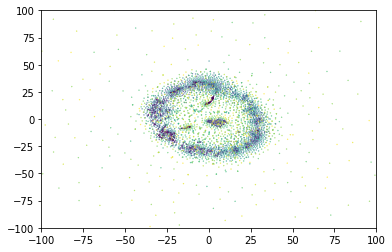

In [60]:
plt.scatter(X_embedded_4[:,0], X_embedded_4[:,1], c=temps, s=0.1)
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.savefig('tsne-try-sklearn-xy_9150_correct.jpg', dpi=300)
plt.show()
plt.close()

In [61]:
X_embedded_5 = TSNE(n_components=2, verbose=1, n_iter=10000, metric='precomputed', perplexity=100).fit_transform(D)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 4200 samples in 0.011s...
[t-SNE] Computed neighbors for 4200 samples in 0.244s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4200
[t-SNE] Computed conditional probabilities for sample 2000 / 4200
[t-SNE] Computed conditional probabilities for sample 3000 / 4200
[t-SNE] Computed conditional probabilities for sample 4000 / 4200
[t-SNE] Computed conditional probabilities for sample 4200 / 4200
[t-SNE] Mean sigma: 14.592872
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.190224
[t-SNE] Error after 2100 iterations: 1.899286


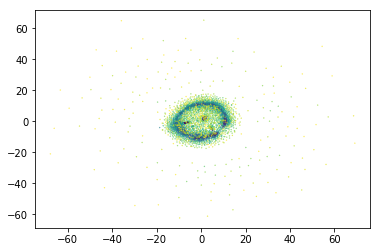

In [63]:
plt.scatter(X_embedded_5[:,0], X_embedded_5[:,1], c=temps, s=0.1)
# plt.xlim(-100,100)
# plt.ylim(-100,100)
plt.savefig('tsne-try-sklearn-xy_2100_correctt.jpg', dpi=300)
plt.show()
plt.close()

In [64]:
X_embedded_6 = TSNE(n_components=2, verbose=1, n_iter=10000, perplexity=120).fit_transform(PCA_dataset)

[t-SNE] Computing 361 nearest neighbors...
[t-SNE] Indexed 4200 samples in 2.420s...
[t-SNE] Computed neighbors for 4200 samples in 201.659s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4200
[t-SNE] Computed conditional probabilities for sample 2000 / 4200
[t-SNE] Computed conditional probabilities for sample 3000 / 4200
[t-SNE] Computed conditional probabilities for sample 4000 / 4200
[t-SNE] Computed conditional probabilities for sample 4200 / 4200
[t-SNE] Mean sigma: 11.611139
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.704086
[t-SNE] Error after 4550 iterations: 2.021612


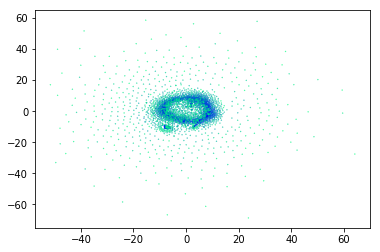

In [66]:
plt.scatter(X_embedded_6[:,0], X_embedded_6[:,1], c=temps, s=0.1, cmap=plt.cm.winter)
# plt.xlim(-100,100)
# plt.ylim(-100,100)
plt.savefig('tsne-try-sklearn-xy_4550_sinusoidal.jpg', dpi=300)
plt.show()
plt.close()